# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

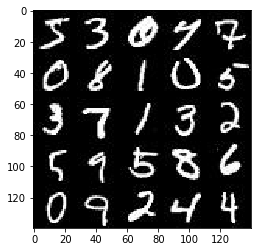

In [10]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot
import numpy as np

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

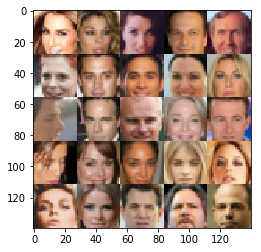

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


D:\Program Files\Anaconda3\envs\dlnd\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    # real_dim = (image_width, image_height, image_channels)
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    lr = tf.placeholder(tf.float32, name='learning_rate')

    return inputs_real, inputs_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [64]:
def discriminator_wgan(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.01
    with tf.variable_scope('discriminator', reuse=reuse):
        # input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='SAME')
        x1 = tf.maximum(alpha*x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='SAME')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha*x2, x2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='SAME')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha*x3, x3)
        # 4x4x256
        
        flat = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        #out = tf.sigmoid(logits)
        out=logits

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [33]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.01
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 7*7*256)
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        # 7x7x256
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='SAME')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x2, x2)
        # 14x14x128
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='SAME')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha*x3, x3)
        # 28x28x64
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='SAME')
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [71]:
def model_loss_wgan(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator_wgan(input_real)
    d_model_fake, d_logits_fake = discriminator_wgan(g_model, reuse=True)
    
    
    d_loss = tf.reduce_mean(d_logits_real - d_logits_fake)
    g_loss = tf.reduce_mean(d_logits_fake)
    
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [35]:
clip_values=[-0.01, 0.01]

In [27]:
(1,*clip_values)

(1, -0.01, 0.01)

In [72]:
def model_opt_wgan(d_loss, g_loss, learning_rate):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    clip_values=[-0.01, 0.01]
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_clip = [var.assign(tf.clip_by_value(var, *clip_values)) 
              for var in d_vars]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.RMSPropOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.RMSPropOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt, d_clip


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [73]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [74]:
def train_wgan(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, img_w, img_h, img_d = data_shape
    input_real, input_z, lr = model_inputs(img_w, img_h, img_d, z_dim)
    d_loss, g_loss = model_loss_wgan(input_real, input_z, img_d)
    d_opt, g_opt, d_clip = model_opt_wgan(d_loss, g_loss, lr)
    
    saver = tf.train.Saver()

    losses = []
    steps = 0
    print_every = 10
    show_every = 100
    # figsize=(5,5)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_images *= 2 # from [-0.5, 0.5] to [-1, 1]
                steps += 1

                # Sample random noise for Generator
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                for _ in range(5):
                    batch_z = np.random.uniform(-1.0, 1.0, size=[batch_size, z_dim])
                    _ = sess.run([d_opt, d_loss, d_clip], feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run([g_opt, g_loss], feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 9, input_z, img_d, data_image_mode)

        saver.save(sess, './generator.ckpt')
    
    return losses
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: -0.0003... Generator Loss: 0.0001
Epoch 1/2... Discriminator Loss: -0.0005... Generator Loss: 0.0003
Epoch 1/2... Discriminator Loss: -0.0018... Generator Loss: 0.0005
Epoch 1/2... Discriminator Loss: -0.0697... Generator Loss: 0.0266
Epoch 1/2... Discriminator Loss: -0.2974... Generator Loss: 0.1382
Epoch 1/2... Discriminator Loss: -0.4432... Generator Loss: 0.2100
Epoch 1/2... Discriminator Loss: -0.2810... Generator Loss: 0.0864
Epoch 1/2... Discriminator Loss: -0.3661... Generator Loss: 0.1844
Epoch 1/2... Discriminator Loss: -0.3481... Generator Loss: 0.2049
Epoch 1/2... Discriminator Loss: -0.3716... Generator Loss: 0.2090


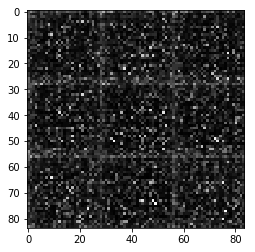

Epoch 1/2... Discriminator Loss: -0.4134... Generator Loss: 0.2322
Epoch 1/2... Discriminator Loss: -0.3733... Generator Loss: 0.2529
Epoch 1/2... Discriminator Loss: -0.1415... Generator Loss: -0.0417
Epoch 1/2... Discriminator Loss: -0.3214... Generator Loss: 0.1403
Epoch 1/2... Discriminator Loss: -0.0864... Generator Loss: -0.0101
Epoch 1/2... Discriminator Loss: -0.3005... Generator Loss: 0.1636
Epoch 1/2... Discriminator Loss: -0.1677... Generator Loss: 0.0882
Epoch 1/2... Discriminator Loss: -0.0169... Generator Loss: 0.0580
Epoch 1/2... Discriminator Loss: -0.0081... Generator Loss: 0.0462
Epoch 1/2... Discriminator Loss: -0.0927... Generator Loss: 0.0580


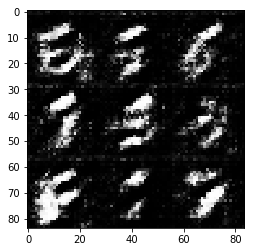

Epoch 1/2... Discriminator Loss: -0.1551... Generator Loss: 0.0724
Epoch 1/2... Discriminator Loss: 0.0144... Generator Loss: -0.0442
Epoch 1/2... Discriminator Loss: -0.0392... Generator Loss: -0.1037
Epoch 1/2... Discriminator Loss: -0.0336... Generator Loss: 0.0032
Epoch 1/2... Discriminator Loss: -0.0450... Generator Loss: -0.0534
Epoch 1/2... Discriminator Loss: -0.0366... Generator Loss: -0.0682
Epoch 1/2... Discriminator Loss: -0.0374... Generator Loss: 0.0128
Epoch 1/2... Discriminator Loss: -0.0092... Generator Loss: -0.0862
Epoch 1/2... Discriminator Loss: -0.0192... Generator Loss: -0.0058
Epoch 1/2... Discriminator Loss: -0.0322... Generator Loss: 0.0243


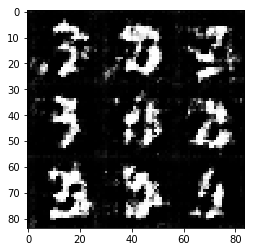

Epoch 1/2... Discriminator Loss: -0.0336... Generator Loss: 0.0082
Epoch 1/2... Discriminator Loss: -0.0298... Generator Loss: 0.0568
Epoch 1/2... Discriminator Loss: -0.0480... Generator Loss: 0.1040
Epoch 1/2... Discriminator Loss: -0.0587... Generator Loss: -0.0155
Epoch 1/2... Discriminator Loss: -0.0445... Generator Loss: -0.0241
Epoch 1/2... Discriminator Loss: -0.0403... Generator Loss: 0.0467
Epoch 1/2... Discriminator Loss: -0.0456... Generator Loss: 0.0067
Epoch 1/2... Discriminator Loss: -0.0668... Generator Loss: 0.1203
Epoch 1/2... Discriminator Loss: -0.0308... Generator Loss: -0.0230
Epoch 1/2... Discriminator Loss: -0.0144... Generator Loss: 0.0157


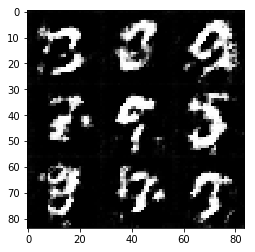

Epoch 1/2... Discriminator Loss: -0.0465... Generator Loss: -0.0427
Epoch 1/2... Discriminator Loss: -0.0368... Generator Loss: 0.0392
Epoch 1/2... Discriminator Loss: -0.0279... Generator Loss: 0.0292
Epoch 1/2... Discriminator Loss: -0.0454... Generator Loss: 0.0022
Epoch 1/2... Discriminator Loss: -0.0502... Generator Loss: -0.0243
Epoch 1/2... Discriminator Loss: -0.0258... Generator Loss: -0.0759
Epoch 1/2... Discriminator Loss: -0.0267... Generator Loss: -0.0359
Epoch 1/2... Discriminator Loss: -0.0303... Generator Loss: -0.0436
Epoch 1/2... Discriminator Loss: -0.0335... Generator Loss: -0.0061
Epoch 1/2... Discriminator Loss: -0.0364... Generator Loss: 0.0627


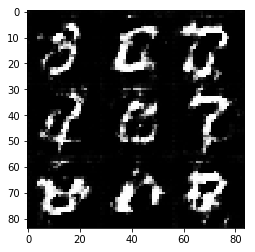

Epoch 1/2... Discriminator Loss: -0.0358... Generator Loss: 0.0864
Epoch 1/2... Discriminator Loss: -0.0267... Generator Loss: 0.0130
Epoch 1/2... Discriminator Loss: -0.0402... Generator Loss: 0.0117
Epoch 1/2... Discriminator Loss: -0.0476... Generator Loss: 0.0181
Epoch 1/2... Discriminator Loss: -0.0413... Generator Loss: -0.0400
Epoch 1/2... Discriminator Loss: -0.0282... Generator Loss: 0.0612
Epoch 1/2... Discriminator Loss: -0.0256... Generator Loss: -0.0551
Epoch 1/2... Discriminator Loss: -0.0407... Generator Loss: 0.0437
Epoch 1/2... Discriminator Loss: -0.0270... Generator Loss: 0.0160
Epoch 1/2... Discriminator Loss: -0.0424... Generator Loss: -0.0441


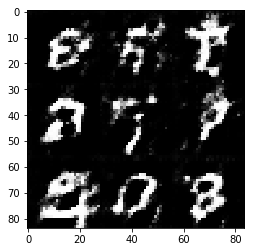

Epoch 1/2... Discriminator Loss: -0.0430... Generator Loss: 0.0557
Epoch 1/2... Discriminator Loss: -0.0364... Generator Loss: 0.0573
Epoch 1/2... Discriminator Loss: -0.0311... Generator Loss: -0.0119
Epoch 1/2... Discriminator Loss: -0.0335... Generator Loss: 0.0324
Epoch 1/2... Discriminator Loss: -0.0276... Generator Loss: 0.0130
Epoch 1/2... Discriminator Loss: -0.0247... Generator Loss: -0.0452
Epoch 1/2... Discriminator Loss: -0.0290... Generator Loss: -0.0106
Epoch 1/2... Discriminator Loss: -0.0375... Generator Loss: 0.0420
Epoch 1/2... Discriminator Loss: -0.0210... Generator Loss: -0.0550
Epoch 1/2... Discriminator Loss: -0.0288... Generator Loss: 0.0061


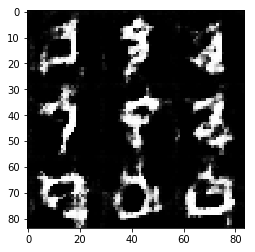

Epoch 1/2... Discriminator Loss: -0.0659... Generator Loss: 0.0015
Epoch 1/2... Discriminator Loss: -0.0057... Generator Loss: -0.0461
Epoch 1/2... Discriminator Loss: -0.0091... Generator Loss: -0.0036
Epoch 1/2... Discriminator Loss: -0.0376... Generator Loss: 0.1188
Epoch 1/2... Discriminator Loss: -0.0264... Generator Loss: 0.0257
Epoch 1/2... Discriminator Loss: -0.0257... Generator Loss: -0.0448
Epoch 1/2... Discriminator Loss: -0.0201... Generator Loss: 0.0129
Epoch 1/2... Discriminator Loss: -0.0289... Generator Loss: 0.0778
Epoch 1/2... Discriminator Loss: -0.0115... Generator Loss: -0.0424
Epoch 1/2... Discriminator Loss: -0.0207... Generator Loss: 0.0251


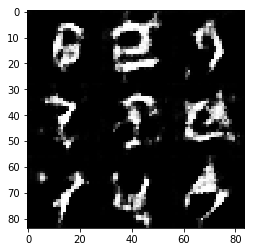

Epoch 1/2... Discriminator Loss: -0.0327... Generator Loss: -0.0068
Epoch 1/2... Discriminator Loss: -0.0279... Generator Loss: -0.0172
Epoch 1/2... Discriminator Loss: -0.0057... Generator Loss: -0.0750
Epoch 1/2... Discriminator Loss: -0.0092... Generator Loss: -0.0724
Epoch 1/2... Discriminator Loss: -0.0107... Generator Loss: 0.0049
Epoch 1/2... Discriminator Loss: 0.0494... Generator Loss: 0.1778
Epoch 1/2... Discriminator Loss: 0.0082... Generator Loss: 0.0148
Epoch 1/2... Discriminator Loss: -0.0336... Generator Loss: -0.0051
Epoch 1/2... Discriminator Loss: -0.0044... Generator Loss: -0.0318
Epoch 1/2... Discriminator Loss: -0.0291... Generator Loss: 0.0126


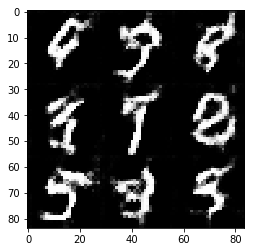

Epoch 1/2... Discriminator Loss: -0.0248... Generator Loss: -0.0418
Epoch 1/2... Discriminator Loss: -0.0296... Generator Loss: 0.0843
Epoch 1/2... Discriminator Loss: 0.0052... Generator Loss: -0.1095
Epoch 2/2... Discriminator Loss: -0.0352... Generator Loss: -0.0190
Epoch 2/2... Discriminator Loss: 0.0037... Generator Loss: -0.0332
Epoch 2/2... Discriminator Loss: -0.0124... Generator Loss: 0.0273
Epoch 2/2... Discriminator Loss: 0.0051... Generator Loss: -0.0121
Epoch 2/2... Discriminator Loss: -0.0179... Generator Loss: 0.0163
Epoch 2/2... Discriminator Loss: -0.0039... Generator Loss: 0.0781
Epoch 2/2... Discriminator Loss: -0.0182... Generator Loss: -0.0410


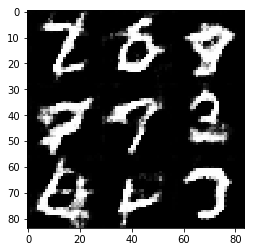

Epoch 2/2... Discriminator Loss: -0.0081... Generator Loss: 0.0354
Epoch 2/2... Discriminator Loss: -0.0341... Generator Loss: 0.0255
Epoch 2/2... Discriminator Loss: -0.0309... Generator Loss: 0.0025
Epoch 2/2... Discriminator Loss: -0.0100... Generator Loss: -0.0394
Epoch 2/2... Discriminator Loss: -0.0430... Generator Loss: 0.0731
Epoch 2/2... Discriminator Loss: -0.0217... Generator Loss: 0.0283
Epoch 2/2... Discriminator Loss: -0.0204... Generator Loss: 0.0278
Epoch 2/2... Discriminator Loss: -0.0195... Generator Loss: -0.0010
Epoch 2/2... Discriminator Loss: 0.0150... Generator Loss: -0.0705
Epoch 2/2... Discriminator Loss: -0.0126... Generator Loss: -0.0128


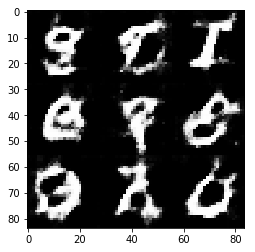

Epoch 2/2... Discriminator Loss: -0.0453... Generator Loss: 0.0367
Epoch 2/2... Discriminator Loss: -0.0153... Generator Loss: 0.0214
Epoch 2/2... Discriminator Loss: -0.0040... Generator Loss: 0.0158
Epoch 2/2... Discriminator Loss: -0.0151... Generator Loss: -0.0683
Epoch 2/2... Discriminator Loss: 0.0275... Generator Loss: -0.0537
Epoch 2/2... Discriminator Loss: -0.0190... Generator Loss: -0.0108
Epoch 2/2... Discriminator Loss: -0.0221... Generator Loss: 0.0316
Epoch 2/2... Discriminator Loss: -0.0301... Generator Loss: -0.0623
Epoch 2/2... Discriminator Loss: -0.0177... Generator Loss: 0.0563
Epoch 2/2... Discriminator Loss: -0.0037... Generator Loss: 0.0234


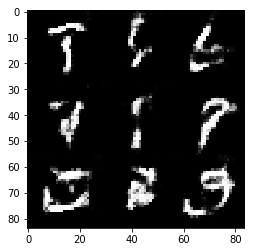

Epoch 2/2... Discriminator Loss: 0.0191... Generator Loss: 0.0023
Epoch 2/2... Discriminator Loss: -0.0070... Generator Loss: 0.0174
Epoch 2/2... Discriminator Loss: -0.0078... Generator Loss: -0.0229
Epoch 2/2... Discriminator Loss: -0.0458... Generator Loss: 0.0367
Epoch 2/2... Discriminator Loss: -0.0120... Generator Loss: -0.0745
Epoch 2/2... Discriminator Loss: -0.0138... Generator Loss: -0.0642
Epoch 2/2... Discriminator Loss: -0.0209... Generator Loss: -0.0513
Epoch 2/2... Discriminator Loss: 0.0084... Generator Loss: -0.0792
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: -0.0054
Epoch 2/2... Discriminator Loss: -0.0029... Generator Loss: -0.0692


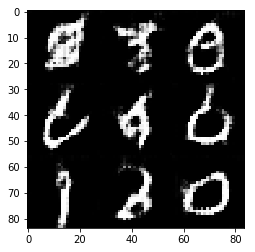

Epoch 2/2... Discriminator Loss: -0.0275... Generator Loss: 0.0331
Epoch 2/2... Discriminator Loss: 0.0140... Generator Loss: 0.0155
Epoch 2/2... Discriminator Loss: -0.0121... Generator Loss: -0.0560
Epoch 2/2... Discriminator Loss: -0.0123... Generator Loss: 0.0351
Epoch 2/2... Discriminator Loss: -0.0069... Generator Loss: -0.0848
Epoch 2/2... Discriminator Loss: -0.0253... Generator Loss: -0.0163
Epoch 2/2... Discriminator Loss: -0.0200... Generator Loss: -0.0390
Epoch 2/2... Discriminator Loss: -0.0015... Generator Loss: -0.0021
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: -0.0565
Epoch 2/2... Discriminator Loss: -0.0471... Generator Loss: -0.0787


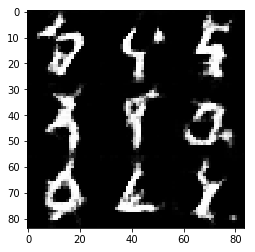

Epoch 2/2... Discriminator Loss: -0.0435... Generator Loss: 0.0237
Epoch 2/2... Discriminator Loss: -0.0146... Generator Loss: 0.0110
Epoch 2/2... Discriminator Loss: -0.0020... Generator Loss: -0.1159
Epoch 2/2... Discriminator Loss: -0.0146... Generator Loss: -0.0211
Epoch 2/2... Discriminator Loss: -0.0339... Generator Loss: -0.0777
Epoch 2/2... Discriminator Loss: -0.0162... Generator Loss: -0.0591
Epoch 2/2... Discriminator Loss: -0.0167... Generator Loss: -0.0761
Epoch 2/2... Discriminator Loss: -0.0071... Generator Loss: 0.0745
Epoch 2/2... Discriminator Loss: 0.0062... Generator Loss: 0.0001
Epoch 2/2... Discriminator Loss: -0.0497... Generator Loss: 0.0619


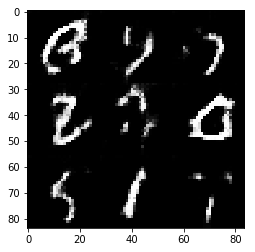

Epoch 2/2... Discriminator Loss: -0.0200... Generator Loss: -0.0998
Epoch 2/2... Discriminator Loss: -0.0168... Generator Loss: 0.0566
Epoch 2/2... Discriminator Loss: -0.0220... Generator Loss: 0.0939
Epoch 2/2... Discriminator Loss: -0.0119... Generator Loss: -0.0450
Epoch 2/2... Discriminator Loss: -0.0378... Generator Loss: 0.0737
Epoch 2/2... Discriminator Loss: -0.0096... Generator Loss: -0.0337
Epoch 2/2... Discriminator Loss: -0.0143... Generator Loss: 0.1075
Epoch 2/2... Discriminator Loss: 0.0074... Generator Loss: 0.0977
Epoch 2/2... Discriminator Loss: -0.0180... Generator Loss: 0.1236
Epoch 2/2... Discriminator Loss: -0.0075... Generator Loss: -0.0903


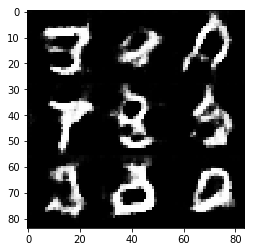

Epoch 2/2... Discriminator Loss: -0.0017... Generator Loss: -0.0315
Epoch 2/2... Discriminator Loss: -0.0103... Generator Loss: -0.0153
Epoch 2/2... Discriminator Loss: -0.0277... Generator Loss: -0.0251
Epoch 2/2... Discriminator Loss: -0.0387... Generator Loss: 0.0621
Epoch 2/2... Discriminator Loss: -0.0157... Generator Loss: -0.0375
Epoch 2/2... Discriminator Loss: -0.0296... Generator Loss: 0.0268
Epoch 2/2... Discriminator Loss: -0.0039... Generator Loss: 0.0407
Epoch 2/2... Discriminator Loss: -0.0200... Generator Loss: -0.0451
Epoch 2/2... Discriminator Loss: 0.0338... Generator Loss: 0.1245
Epoch 2/2... Discriminator Loss: -0.0175... Generator Loss: 0.1909


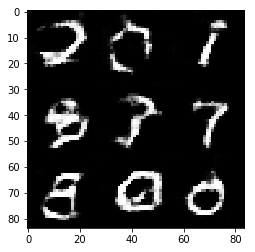

Epoch 2/2... Discriminator Loss: -0.0058... Generator Loss: 0.0981
Epoch 2/2... Discriminator Loss: 0.0182... Generator Loss: 0.0754
Epoch 2/2... Discriminator Loss: -0.0198... Generator Loss: 0.1044
Epoch 2/2... Discriminator Loss: -0.0209... Generator Loss: 0.0718
Epoch 2/2... Discriminator Loss: -0.0172... Generator Loss: -0.0031
Epoch 2/2... Discriminator Loss: -0.0068... Generator Loss: 0.0324
Epoch 2/2... Discriminator Loss: -0.0308... Generator Loss: 0.0499
Epoch 2/2... Discriminator Loss: -0.0068... Generator Loss: -0.1206
Epoch 2/2... Discriminator Loss: -0.0250... Generator Loss: 0.0193
Epoch 2/2... Discriminator Loss: 0.0072... Generator Loss: 0.2212


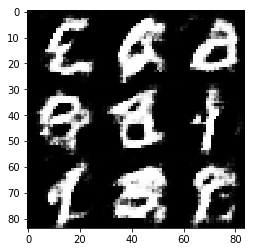

Epoch 2/2... Discriminator Loss: -0.0144... Generator Loss: -0.0811
Epoch 2/2... Discriminator Loss: -0.0199... Generator Loss: -0.0655
Epoch 2/2... Discriminator Loss: -0.0029... Generator Loss: -0.1489
Epoch 2/2... Discriminator Loss: 0.0036... Generator Loss: 0.0238
Epoch 2/2... Discriminator Loss: 0.0214... Generator Loss: -0.0274
Epoch 2/2... Discriminator Loss: 0.0031... Generator Loss: -0.0477
Epoch 2/2... Discriminator Loss: -0.0335... Generator Loss: 0.0273


In [76]:
batch_size = 64
z_dim = 100
learning_rate = 1e-4
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    losses_mnist = train_wgan(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

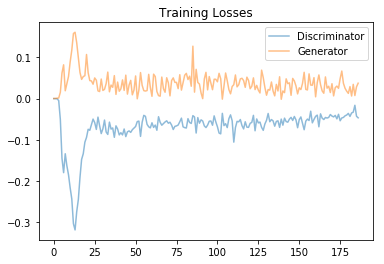

In [61]:
losses_mnist = np.array(losses_mnist)
#losses_discriminator = [i[0] for i in losses_mnist.T[0]]
#losses_generator = [i[1] for i in losses_mnist.T[0]]

fig, ax = pyplot.subplots()
#pyplot.plot(losses_discriminator, label='Discriminator', alpha=0.5)
#pyplot.plot(losses_generator, label='Generator', alpha=0.5)

pyplot.plot(losses_mnist.T[0], label='Discriminator', alpha=0.5)
pyplot.plot(losses_mnist.T[1], label='Generator', alpha=0.5)

pyplot.title("Training Losses")
pyplot.legend()

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: -0.0003... Generator Loss: 0.0000
Epoch 1/1... Discriminator Loss: -0.0005... Generator Loss: -0.0001
Epoch 1/1... Discriminator Loss: -0.0016... Generator Loss: 0.0005
Epoch 1/1... Discriminator Loss: -0.0706... Generator Loss: 0.0448
Epoch 1/1... Discriminator Loss: -0.2520... Generator Loss: 0.1441
Epoch 1/1... Discriminator Loss: -0.4376... Generator Loss: 0.2144
Epoch 1/1... Discriminator Loss: -0.5123... Generator Loss: 0.2489
Epoch 1/1... Discriminator Loss: -0.4170... Generator Loss: 0.1825
Epoch 1/1... Discriminator Loss: -0.2273... Generator Loss: 0.0463
Epoch 1/1... Discriminator Loss: -0.3914... Generator Loss: 0.1751


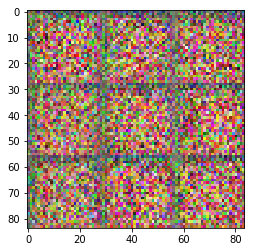

Epoch 1/1... Discriminator Loss: -0.3951... Generator Loss: 0.1804
Epoch 1/1... Discriminator Loss: -0.4430... Generator Loss: 0.2074
Epoch 1/1... Discriminator Loss: -0.4610... Generator Loss: 0.2528
Epoch 1/1... Discriminator Loss: -0.4816... Generator Loss: 0.2371
Epoch 1/1... Discriminator Loss: -0.3717... Generator Loss: 0.1503
Epoch 1/1... Discriminator Loss: -0.3778... Generator Loss: 0.1605
Epoch 1/1... Discriminator Loss: -0.4044... Generator Loss: 0.1893
Epoch 1/1... Discriminator Loss: -0.2823... Generator Loss: 0.0850
Epoch 1/1... Discriminator Loss: -0.3340... Generator Loss: 0.1165
Epoch 1/1... Discriminator Loss: -0.2741... Generator Loss: 0.1284


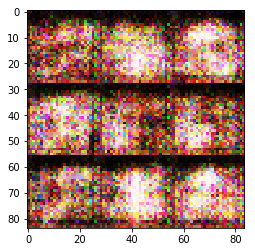

Epoch 1/1... Discriminator Loss: -0.3404... Generator Loss: 0.1287
Epoch 1/1... Discriminator Loss: -0.2365... Generator Loss: 0.1092
Epoch 1/1... Discriminator Loss: -0.2671... Generator Loss: 0.1243
Epoch 1/1... Discriminator Loss: -0.2181... Generator Loss: -0.0052
Epoch 1/1... Discriminator Loss: -0.2778... Generator Loss: 0.1285
Epoch 1/1... Discriminator Loss: -0.2249... Generator Loss: 0.1134
Epoch 1/1... Discriminator Loss: -0.2520... Generator Loss: 0.1553
Epoch 1/1... Discriminator Loss: -0.2403... Generator Loss: 0.0778
Epoch 1/1... Discriminator Loss: -0.1619... Generator Loss: 0.0720
Epoch 1/1... Discriminator Loss: -0.3034... Generator Loss: 0.1399


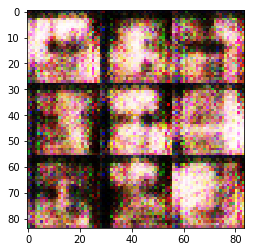

Epoch 1/1... Discriminator Loss: -0.1555... Generator Loss: 0.0059
Epoch 1/1... Discriminator Loss: -0.2036... Generator Loss: 0.0963
Epoch 1/1... Discriminator Loss: -0.1478... Generator Loss: 0.0366
Epoch 1/1... Discriminator Loss: -0.1897... Generator Loss: 0.0144
Epoch 1/1... Discriminator Loss: -0.1527... Generator Loss: 0.0119
Epoch 1/1... Discriminator Loss: -0.2571... Generator Loss: 0.1159
Epoch 1/1... Discriminator Loss: -0.2753... Generator Loss: 0.0970
Epoch 1/1... Discriminator Loss: -0.1254... Generator Loss: -0.0174
Epoch 1/1... Discriminator Loss: -0.2482... Generator Loss: 0.1161
Epoch 1/1... Discriminator Loss: -0.2424... Generator Loss: 0.0599


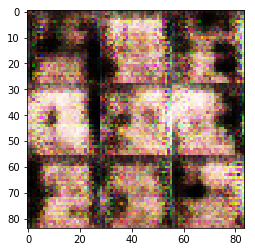

Epoch 1/1... Discriminator Loss: -0.2858... Generator Loss: 0.1157
Epoch 1/1... Discriminator Loss: -0.1367... Generator Loss: -0.0560
Epoch 1/1... Discriminator Loss: -0.2158... Generator Loss: 0.1150
Epoch 1/1... Discriminator Loss: -0.2051... Generator Loss: 0.0521
Epoch 1/1... Discriminator Loss: -0.2180... Generator Loss: 0.1130
Epoch 1/1... Discriminator Loss: -0.2110... Generator Loss: 0.0296
Epoch 1/1... Discriminator Loss: -0.2375... Generator Loss: 0.0986
Epoch 1/1... Discriminator Loss: -0.1168... Generator Loss: -0.0771
Epoch 1/1... Discriminator Loss: -0.2180... Generator Loss: 0.1101
Epoch 1/1... Discriminator Loss: -0.1392... Generator Loss: -0.0148


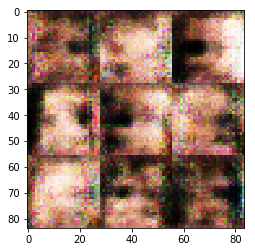

Epoch 1/1... Discriminator Loss: -0.2243... Generator Loss: 0.0562
Epoch 1/1... Discriminator Loss: -0.1210... Generator Loss: 0.0313
Epoch 1/1... Discriminator Loss: -0.1490... Generator Loss: -0.0314
Epoch 1/1... Discriminator Loss: -0.1507... Generator Loss: 0.0692
Epoch 1/1... Discriminator Loss: -0.1461... Generator Loss: 0.0741
Epoch 1/1... Discriminator Loss: -0.1924... Generator Loss: 0.0217
Epoch 1/1... Discriminator Loss: -0.1296... Generator Loss: -0.0570
Epoch 1/1... Discriminator Loss: -0.1743... Generator Loss: 0.0656
Epoch 1/1... Discriminator Loss: -0.2010... Generator Loss: 0.0371
Epoch 1/1... Discriminator Loss: -0.1985... Generator Loss: 0.1151


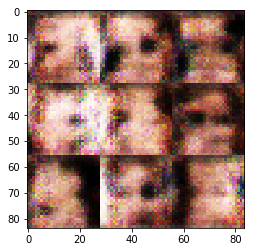

Epoch 1/1... Discriminator Loss: -0.2200... Generator Loss: 0.1205
Epoch 1/1... Discriminator Loss: -0.0652... Generator Loss: -0.1436
Epoch 1/1... Discriminator Loss: -0.1039... Generator Loss: -0.0088
Epoch 1/1... Discriminator Loss: -0.1329... Generator Loss: 0.0420
Epoch 1/1... Discriminator Loss: -0.2039... Generator Loss: 0.1122
Epoch 1/1... Discriminator Loss: -0.1667... Generator Loss: 0.1179
Epoch 1/1... Discriminator Loss: -0.2233... Generator Loss: 0.0597
Epoch 1/1... Discriminator Loss: -0.1294... Generator Loss: 0.0692
Epoch 1/1... Discriminator Loss: -0.1897... Generator Loss: 0.1081
Epoch 1/1... Discriminator Loss: -0.1092... Generator Loss: 0.0067


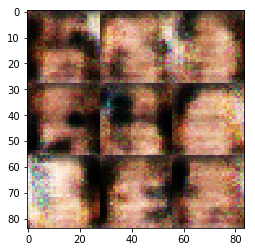

Epoch 1/1... Discriminator Loss: -0.0932... Generator Loss: -0.0015
Epoch 1/1... Discriminator Loss: -0.0748... Generator Loss: -0.1131
Epoch 1/1... Discriminator Loss: -0.1024... Generator Loss: -0.0125
Epoch 1/1... Discriminator Loss: -0.1325... Generator Loss: 0.0248
Epoch 1/1... Discriminator Loss: -0.1847... Generator Loss: 0.0537
Epoch 1/1... Discriminator Loss: -0.0746... Generator Loss: -0.1095
Epoch 1/1... Discriminator Loss: -0.1856... Generator Loss: 0.0691
Epoch 1/1... Discriminator Loss: -0.0873... Generator Loss: 0.0000
Epoch 1/1... Discriminator Loss: -0.0842... Generator Loss: 0.0884
Epoch 1/1... Discriminator Loss: -0.1488... Generator Loss: 0.0011


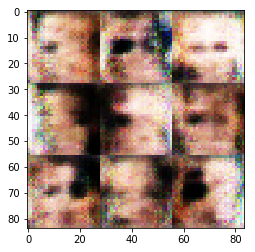

Epoch 1/1... Discriminator Loss: -0.1266... Generator Loss: 0.0436
Epoch 1/1... Discriminator Loss: -0.1384... Generator Loss: 0.0581
Epoch 1/1... Discriminator Loss: -0.0595... Generator Loss: 0.0357
Epoch 1/1... Discriminator Loss: -0.1147... Generator Loss: 0.0128
Epoch 1/1... Discriminator Loss: -0.1421... Generator Loss: 0.0669
Epoch 1/1... Discriminator Loss: -0.0754... Generator Loss: -0.0208
Epoch 1/1... Discriminator Loss: -0.0942... Generator Loss: -0.0184
Epoch 1/1... Discriminator Loss: -0.0613... Generator Loss: 0.0383
Epoch 1/1... Discriminator Loss: -0.0451... Generator Loss: -0.1087
Epoch 1/1... Discriminator Loss: -0.0963... Generator Loss: -0.0016


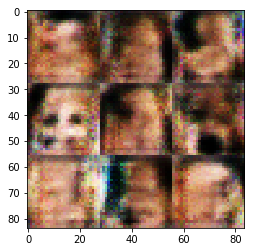

Epoch 1/1... Discriminator Loss: -0.1840... Generator Loss: 0.1126
Epoch 1/1... Discriminator Loss: -0.1108... Generator Loss: 0.0395
Epoch 1/1... Discriminator Loss: -0.1750... Generator Loss: 0.0783
Epoch 1/1... Discriminator Loss: -0.0714... Generator Loss: 0.0466
Epoch 1/1... Discriminator Loss: -0.0782... Generator Loss: -0.0142
Epoch 1/1... Discriminator Loss: -0.1294... Generator Loss: 0.0693
Epoch 1/1... Discriminator Loss: -0.1853... Generator Loss: 0.1455
Epoch 1/1... Discriminator Loss: -0.0837... Generator Loss: 0.0073
Epoch 1/1... Discriminator Loss: -0.1452... Generator Loss: 0.0527
Epoch 1/1... Discriminator Loss: -0.0716... Generator Loss: 0.0353


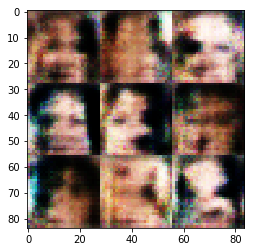

Epoch 1/1... Discriminator Loss: -0.0989... Generator Loss: -0.0295
Epoch 1/1... Discriminator Loss: -0.1108... Generator Loss: 0.0460
Epoch 1/1... Discriminator Loss: -0.0843... Generator Loss: -0.0106
Epoch 1/1... Discriminator Loss: -0.1773... Generator Loss: 0.0979
Epoch 1/1... Discriminator Loss: -0.1690... Generator Loss: 0.1027
Epoch 1/1... Discriminator Loss: -0.0470... Generator Loss: -0.1148
Epoch 1/1... Discriminator Loss: -0.1285... Generator Loss: -0.0066
Epoch 1/1... Discriminator Loss: -0.1067... Generator Loss: 0.0405
Epoch 1/1... Discriminator Loss: -0.1004... Generator Loss: 0.0534
Epoch 1/1... Discriminator Loss: -0.0832... Generator Loss: 0.0045


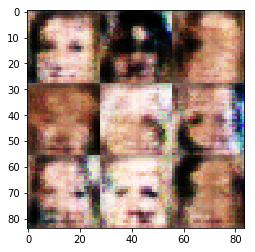

Epoch 1/1... Discriminator Loss: -0.1172... Generator Loss: 0.0803
Epoch 1/1... Discriminator Loss: -0.0581... Generator Loss: -0.0769
Epoch 1/1... Discriminator Loss: -0.0605... Generator Loss: -0.0404
Epoch 1/1... Discriminator Loss: -0.0809... Generator Loss: -0.0587
Epoch 1/1... Discriminator Loss: -0.0971... Generator Loss: -0.0189
Epoch 1/1... Discriminator Loss: -0.1230... Generator Loss: 0.0313
Epoch 1/1... Discriminator Loss: -0.0484... Generator Loss: 0.0346
Epoch 1/1... Discriminator Loss: -0.0662... Generator Loss: -0.0248
Epoch 1/1... Discriminator Loss: -0.0877... Generator Loss: 0.0248
Epoch 1/1... Discriminator Loss: -0.1359... Generator Loss: 0.0751


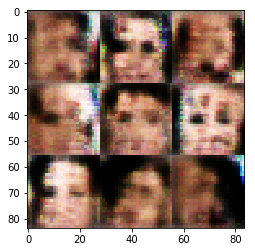

Epoch 1/1... Discriminator Loss: -0.0656... Generator Loss: -0.0379
Epoch 1/1... Discriminator Loss: -0.0729... Generator Loss: -0.0144
Epoch 1/1... Discriminator Loss: -0.1216... Generator Loss: 0.0829
Epoch 1/1... Discriminator Loss: -0.0984... Generator Loss: -0.0053
Epoch 1/1... Discriminator Loss: -0.1164... Generator Loss: 0.0598
Epoch 1/1... Discriminator Loss: -0.0887... Generator Loss: -0.0003
Epoch 1/1... Discriminator Loss: -0.0912... Generator Loss: 0.0293
Epoch 1/1... Discriminator Loss: -0.0859... Generator Loss: 0.0101
Epoch 1/1... Discriminator Loss: -0.0989... Generator Loss: 0.0422
Epoch 1/1... Discriminator Loss: -0.0677... Generator Loss: 0.0395


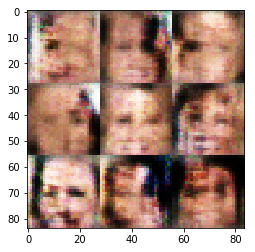

Epoch 1/1... Discriminator Loss: -0.0547... Generator Loss: -0.0822
Epoch 1/1... Discriminator Loss: -0.1172... Generator Loss: 0.0286
Epoch 1/1... Discriminator Loss: -0.1093... Generator Loss: 0.0629
Epoch 1/1... Discriminator Loss: -0.0656... Generator Loss: -0.0336
Epoch 1/1... Discriminator Loss: -0.1041... Generator Loss: 0.0188
Epoch 1/1... Discriminator Loss: -0.0399... Generator Loss: 0.0004
Epoch 1/1... Discriminator Loss: -0.0692... Generator Loss: -0.0002
Epoch 1/1... Discriminator Loss: -0.0767... Generator Loss: -0.0169
Epoch 1/1... Discriminator Loss: -0.0589... Generator Loss: 0.0530
Epoch 1/1... Discriminator Loss: -0.0900... Generator Loss: 0.0453


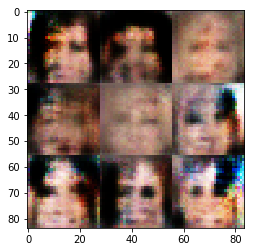

Epoch 1/1... Discriminator Loss: -0.0841... Generator Loss: -0.0099
Epoch 1/1... Discriminator Loss: -0.0667... Generator Loss: 0.0310
Epoch 1/1... Discriminator Loss: -0.0618... Generator Loss: -0.0056
Epoch 1/1... Discriminator Loss: -0.0915... Generator Loss: 0.0296
Epoch 1/1... Discriminator Loss: -0.0455... Generator Loss: 0.0176
Epoch 1/1... Discriminator Loss: -0.0591... Generator Loss: -0.0154
Epoch 1/1... Discriminator Loss: -0.0484... Generator Loss: -0.0071
Epoch 1/1... Discriminator Loss: -0.0459... Generator Loss: 0.0166
Epoch 1/1... Discriminator Loss: -0.0546... Generator Loss: 0.0039
Epoch 1/1... Discriminator Loss: -0.0475... Generator Loss: -0.0448


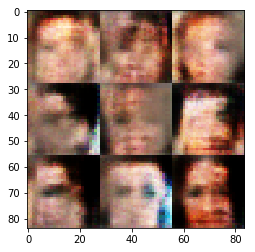

Epoch 1/1... Discriminator Loss: -0.0585... Generator Loss: -0.0042
Epoch 1/1... Discriminator Loss: -0.0453... Generator Loss: 0.0068
Epoch 1/1... Discriminator Loss: -0.0662... Generator Loss: -0.0179
Epoch 1/1... Discriminator Loss: -0.0545... Generator Loss: 0.0204
Epoch 1/1... Discriminator Loss: -0.0686... Generator Loss: 0.0068
Epoch 1/1... Discriminator Loss: -0.0718... Generator Loss: 0.0118
Epoch 1/1... Discriminator Loss: -0.0476... Generator Loss: -0.0413
Epoch 1/1... Discriminator Loss: -0.0725... Generator Loss: 0.0240
Epoch 1/1... Discriminator Loss: -0.0462... Generator Loss: 0.0212
Epoch 1/1... Discriminator Loss: -0.0444... Generator Loss: 0.0197


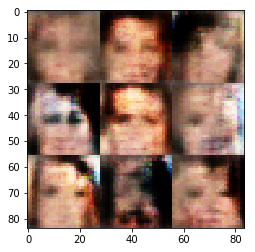

Epoch 1/1... Discriminator Loss: -0.0503... Generator Loss: 0.0273
Epoch 1/1... Discriminator Loss: -0.0413... Generator Loss: 0.0426
Epoch 1/1... Discriminator Loss: -0.0378... Generator Loss: 0.0278
Epoch 1/1... Discriminator Loss: -0.0500... Generator Loss: 0.0132
Epoch 1/1... Discriminator Loss: -0.0579... Generator Loss: -0.0015
Epoch 1/1... Discriminator Loss: -0.0305... Generator Loss: -0.0483
Epoch 1/1... Discriminator Loss: -0.0559... Generator Loss: 0.0064
Epoch 1/1... Discriminator Loss: -0.0472... Generator Loss: -0.0287
Epoch 1/1... Discriminator Loss: -0.0267... Generator Loss: 0.0197
Epoch 1/1... Discriminator Loss: -0.0604... Generator Loss: -0.0086


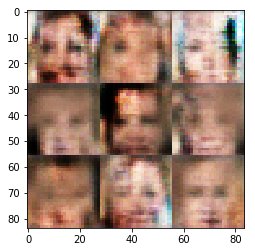

Epoch 1/1... Discriminator Loss: -0.0439... Generator Loss: 0.0183
Epoch 1/1... Discriminator Loss: -0.0625... Generator Loss: 0.0121
Epoch 1/1... Discriminator Loss: -0.0464... Generator Loss: -0.0152
Epoch 1/1... Discriminator Loss: -0.0425... Generator Loss: 0.0206
Epoch 1/1... Discriminator Loss: -0.0319... Generator Loss: -0.0077
Epoch 1/1... Discriminator Loss: -0.0445... Generator Loss: -0.0027
Epoch 1/1... Discriminator Loss: -0.0486... Generator Loss: -0.0234
Epoch 1/1... Discriminator Loss: -0.0329... Generator Loss: -0.0253
Epoch 1/1... Discriminator Loss: -0.0457... Generator Loss: -0.0061
Epoch 1/1... Discriminator Loss: -0.0424... Generator Loss: -0.0069


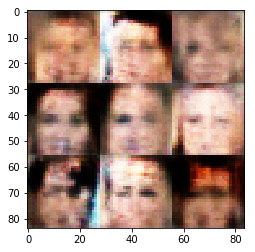

Epoch 1/1... Discriminator Loss: -0.0435... Generator Loss: -0.0068
Epoch 1/1... Discriminator Loss: -0.0527... Generator Loss: -0.0033
Epoch 1/1... Discriminator Loss: -0.0582... Generator Loss: -0.0026
Epoch 1/1... Discriminator Loss: -0.0571... Generator Loss: 0.0151
Epoch 1/1... Discriminator Loss: -0.0441... Generator Loss: -0.0046
Epoch 1/1... Discriminator Loss: -0.0319... Generator Loss: -0.0030
Epoch 1/1... Discriminator Loss: -0.0454... Generator Loss: -0.0047
Epoch 1/1... Discriminator Loss: -0.0592... Generator Loss: -0.0110
Epoch 1/1... Discriminator Loss: -0.0539... Generator Loss: -0.0004
Epoch 1/1... Discriminator Loss: -0.0282... Generator Loss: -0.0271


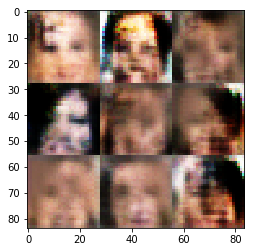

Epoch 1/1... Discriminator Loss: -0.0338... Generator Loss: -0.0458
Epoch 1/1... Discriminator Loss: -0.0426... Generator Loss: -0.0097
Epoch 1/1... Discriminator Loss: -0.0378... Generator Loss: 0.0291
Epoch 1/1... Discriminator Loss: -0.0377... Generator Loss: 0.0086
Epoch 1/1... Discriminator Loss: -0.0393... Generator Loss: -0.0001
Epoch 1/1... Discriminator Loss: -0.0411... Generator Loss: -0.0362
Epoch 1/1... Discriminator Loss: -0.0208... Generator Loss: -0.0354
Epoch 1/1... Discriminator Loss: -0.0418... Generator Loss: -0.0219
Epoch 1/1... Discriminator Loss: -0.0427... Generator Loss: -0.0031
Epoch 1/1... Discriminator Loss: -0.0322... Generator Loss: -0.0098


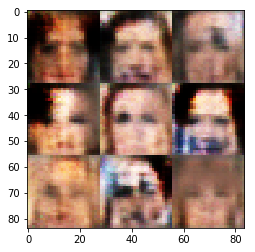

Epoch 1/1... Discriminator Loss: -0.0674... Generator Loss: 0.0052
Epoch 1/1... Discriminator Loss: -0.0322... Generator Loss: -0.0392
Epoch 1/1... Discriminator Loss: -0.0438... Generator Loss: -0.0048
Epoch 1/1... Discriminator Loss: -0.0308... Generator Loss: -0.0619
Epoch 1/1... Discriminator Loss: -0.0406... Generator Loss: 0.0043
Epoch 1/1... Discriminator Loss: -0.0245... Generator Loss: -0.0005
Epoch 1/1... Discriminator Loss: -0.0391... Generator Loss: -0.0070
Epoch 1/1... Discriminator Loss: -0.0581... Generator Loss: 0.0147
Epoch 1/1... Discriminator Loss: -0.0295... Generator Loss: -0.0391
Epoch 1/1... Discriminator Loss: -0.0216... Generator Loss: -0.0588


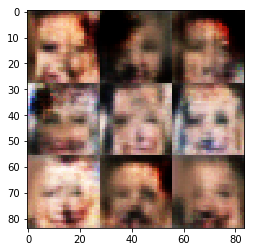

Epoch 1/1... Discriminator Loss: -0.0449... Generator Loss: -0.0313
Epoch 1/1... Discriminator Loss: -0.0370... Generator Loss: -0.0153
Epoch 1/1... Discriminator Loss: -0.0278... Generator Loss: -0.0146
Epoch 1/1... Discriminator Loss: -0.0312... Generator Loss: -0.0372
Epoch 1/1... Discriminator Loss: -0.0197... Generator Loss: -0.0450
Epoch 1/1... Discriminator Loss: -0.0252... Generator Loss: -0.0050
Epoch 1/1... Discriminator Loss: -0.0418... Generator Loss: 0.0111
Epoch 1/1... Discriminator Loss: -0.0342... Generator Loss: -0.0263
Epoch 1/1... Discriminator Loss: -0.0360... Generator Loss: -0.0094
Epoch 1/1... Discriminator Loss: -0.0241... Generator Loss: 0.0123


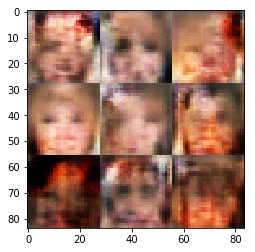

Epoch 1/1... Discriminator Loss: -0.0303... Generator Loss: 0.0106
Epoch 1/1... Discriminator Loss: -0.0420... Generator Loss: -0.0173
Epoch 1/1... Discriminator Loss: -0.0173... Generator Loss: 0.0005
Epoch 1/1... Discriminator Loss: -0.0313... Generator Loss: -0.0043
Epoch 1/1... Discriminator Loss: -0.0409... Generator Loss: -0.0393
Epoch 1/1... Discriminator Loss: -0.0292... Generator Loss: -0.0035
Epoch 1/1... Discriminator Loss: -0.0258... Generator Loss: -0.0201
Epoch 1/1... Discriminator Loss: -0.0362... Generator Loss: -0.0044
Epoch 1/1... Discriminator Loss: -0.0213... Generator Loss: 0.0076
Epoch 1/1... Discriminator Loss: -0.0258... Generator Loss: 0.0303


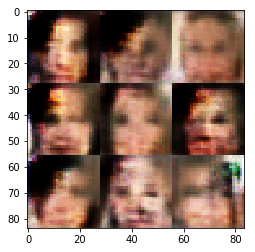

Epoch 1/1... Discriminator Loss: -0.0458... Generator Loss: 0.0041
Epoch 1/1... Discriminator Loss: -0.0306... Generator Loss: 0.0115
Epoch 1/1... Discriminator Loss: -0.0194... Generator Loss: -0.0020
Epoch 1/1... Discriminator Loss: -0.0303... Generator Loss: -0.0108
Epoch 1/1... Discriminator Loss: -0.0299... Generator Loss: -0.0368
Epoch 1/1... Discriminator Loss: -0.0337... Generator Loss: 0.0282
Epoch 1/1... Discriminator Loss: -0.0157... Generator Loss: -0.0173
Epoch 1/1... Discriminator Loss: -0.0434... Generator Loss: -0.0035
Epoch 1/1... Discriminator Loss: -0.0211... Generator Loss: -0.0180
Epoch 1/1... Discriminator Loss: -0.0316... Generator Loss: -0.0009


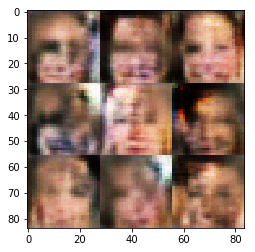

Epoch 1/1... Discriminator Loss: -0.0269... Generator Loss: 0.0151
Epoch 1/1... Discriminator Loss: -0.0321... Generator Loss: 0.0164
Epoch 1/1... Discriminator Loss: -0.0250... Generator Loss: -0.0241
Epoch 1/1... Discriminator Loss: -0.0121... Generator Loss: -0.0316
Epoch 1/1... Discriminator Loss: -0.0216... Generator Loss: -0.0294
Epoch 1/1... Discriminator Loss: -0.0253... Generator Loss: -0.0334
Epoch 1/1... Discriminator Loss: -0.0195... Generator Loss: -0.0072
Epoch 1/1... Discriminator Loss: -0.0305... Generator Loss: -0.0074
Epoch 1/1... Discriminator Loss: -0.0372... Generator Loss: 0.0099
Epoch 1/1... Discriminator Loss: -0.0336... Generator Loss: 0.0215


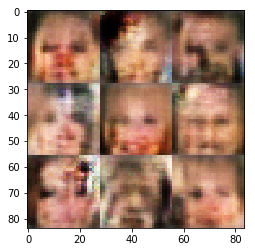

Epoch 1/1... Discriminator Loss: -0.0386... Generator Loss: 0.0014
Epoch 1/1... Discriminator Loss: -0.0433... Generator Loss: -0.0082
Epoch 1/1... Discriminator Loss: -0.0179... Generator Loss: 0.0109
Epoch 1/1... Discriminator Loss: -0.0345... Generator Loss: -0.0425
Epoch 1/1... Discriminator Loss: -0.0338... Generator Loss: 0.0349
Epoch 1/1... Discriminator Loss: -0.0066... Generator Loss: -0.0555
Epoch 1/1... Discriminator Loss: -0.0215... Generator Loss: -0.0185
Epoch 1/1... Discriminator Loss: -0.0163... Generator Loss: -0.0075
Epoch 1/1... Discriminator Loss: -0.0306... Generator Loss: -0.0356
Epoch 1/1... Discriminator Loss: -0.0224... Generator Loss: -0.0154


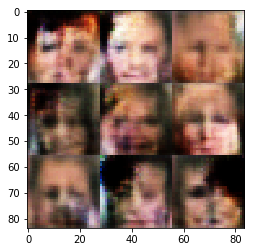

Epoch 1/1... Discriminator Loss: -0.0281... Generator Loss: -0.0406
Epoch 1/1... Discriminator Loss: -0.0273... Generator Loss: -0.0147
Epoch 1/1... Discriminator Loss: -0.0369... Generator Loss: -0.0652
Epoch 1/1... Discriminator Loss: -0.0328... Generator Loss: -0.0002
Epoch 1/1... Discriminator Loss: -0.0275... Generator Loss: 0.0065
Epoch 1/1... Discriminator Loss: -0.0175... Generator Loss: 0.0076
Epoch 1/1... Discriminator Loss: -0.0175... Generator Loss: -0.0229
Epoch 1/1... Discriminator Loss: -0.0268... Generator Loss: -0.0033
Epoch 1/1... Discriminator Loss: -0.0313... Generator Loss: -0.0032
Epoch 1/1... Discriminator Loss: -0.0439... Generator Loss: -0.0502


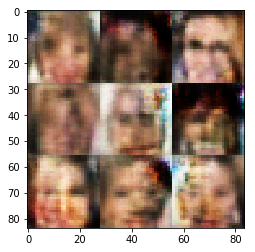

Epoch 1/1... Discriminator Loss: -0.0218... Generator Loss: -0.0042
Epoch 1/1... Discriminator Loss: -0.0208... Generator Loss: 0.0060
Epoch 1/1... Discriminator Loss: -0.0159... Generator Loss: 0.0245
Epoch 1/1... Discriminator Loss: -0.0379... Generator Loss: 0.0249
Epoch 1/1... Discriminator Loss: -0.0200... Generator Loss: -0.0308
Epoch 1/1... Discriminator Loss: -0.0192... Generator Loss: 0.0048
Epoch 1/1... Discriminator Loss: -0.0199... Generator Loss: -0.0400
Epoch 1/1... Discriminator Loss: -0.0335... Generator Loss: -0.0278
Epoch 1/1... Discriminator Loss: -0.0120... Generator Loss: -0.0672
Epoch 1/1... Discriminator Loss: -0.0185... Generator Loss: -0.0516


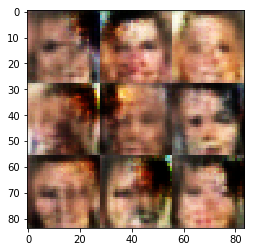

Epoch 1/1... Discriminator Loss: -0.0172... Generator Loss: -0.0612
Epoch 1/1... Discriminator Loss: -0.0145... Generator Loss: 0.0190
Epoch 1/1... Discriminator Loss: -0.0247... Generator Loss: 0.0169
Epoch 1/1... Discriminator Loss: -0.0062... Generator Loss: -0.0158
Epoch 1/1... Discriminator Loss: -0.0202... Generator Loss: -0.0209
Epoch 1/1... Discriminator Loss: -0.0355... Generator Loss: -0.0032
Epoch 1/1... Discriminator Loss: -0.0253... Generator Loss: -0.0546
Epoch 1/1... Discriminator Loss: -0.0172... Generator Loss: 0.0016
Epoch 1/1... Discriminator Loss: -0.0224... Generator Loss: -0.0011
Epoch 1/1... Discriminator Loss: -0.0041... Generator Loss: -0.0392


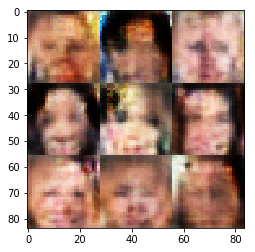

Epoch 1/1... Discriminator Loss: -0.0303... Generator Loss: 0.0180
Epoch 1/1... Discriminator Loss: -0.0263... Generator Loss: -0.0241
Epoch 1/1... Discriminator Loss: -0.0086... Generator Loss: -0.0001
Epoch 1/1... Discriminator Loss: -0.0121... Generator Loss: -0.0223
Epoch 1/1... Discriminator Loss: -0.0087... Generator Loss: -0.0439
Epoch 1/1... Discriminator Loss: -0.0224... Generator Loss: 0.0031
Epoch 1/1... Discriminator Loss: -0.0289... Generator Loss: -0.0052
Epoch 1/1... Discriminator Loss: -0.0125... Generator Loss: -0.0396
Epoch 1/1... Discriminator Loss: -0.0071... Generator Loss: -0.0326
Epoch 1/1... Discriminator Loss: -0.0340... Generator Loss: -0.0196


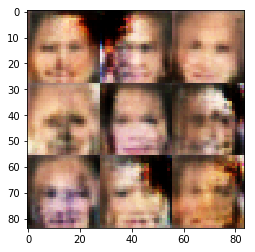

Epoch 1/1... Discriminator Loss: -0.0268... Generator Loss: 0.0081
Epoch 1/1... Discriminator Loss: 0.0055... Generator Loss: -0.0581
Epoch 1/1... Discriminator Loss: -0.0222... Generator Loss: -0.0460
Epoch 1/1... Discriminator Loss: -0.0137... Generator Loss: 0.0290
Epoch 1/1... Discriminator Loss: -0.0167... Generator Loss: -0.0123
Epoch 1/1... Discriminator Loss: -0.0235... Generator Loss: -0.0618
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: -0.0211
Epoch 1/1... Discriminator Loss: -0.0134... Generator Loss: -0.0198
Epoch 1/1... Discriminator Loss: -0.0175... Generator Loss: -0.0033
Epoch 1/1... Discriminator Loss: -0.0131... Generator Loss: 0.0298


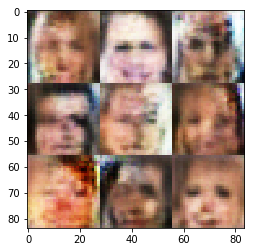

Epoch 1/1... Discriminator Loss: -0.0065... Generator Loss: -0.0393
Epoch 1/1... Discriminator Loss: -0.0139... Generator Loss: -0.0011
Epoch 1/1... Discriminator Loss: -0.0248... Generator Loss: -0.0250
Epoch 1/1... Discriminator Loss: -0.0178... Generator Loss: 0.0656
Epoch 1/1... Discriminator Loss: -0.0261... Generator Loss: -0.0332
Epoch 1/1... Discriminator Loss: -0.0141... Generator Loss: -0.0107


In [77]:
batch_size = 64
z_dim = 100
learning_rate = 1e-4
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    losses_celeba = train_wgan(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

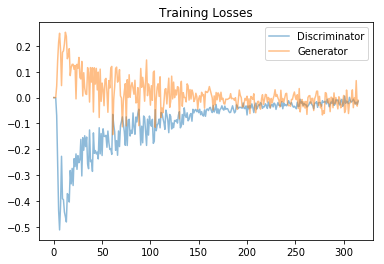

In [78]:
losses_celeba = np.array(losses_celeba)
#losses_discriminator = [i[0] for i in losses_celeba.T[0]]
#losses_generator = [i[1] for i in losses_celeba.T[0]]

fig, ax = pyplot.subplots()
#pyplot.plot(losses_discriminator, label='Discriminator', alpha=0.5)
#pyplot.plot(losses_generator, label='Generator', alpha=0.5)
pyplot.plot(losses_celeba.T[0], label='Discriminator', alpha=0.5)
pyplot.plot(losses_celeba.T[1], label='Generator', alpha=0.5)

pyplot.title("Training Losses")
pyplot.legend()

From the above two figures, the training losses looks meaningless. How to identify the performances of trained network with losses in this project? The only thing I could do is to see qualities of the generated pictures....

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.

### Further Improvement - WGAN

The above cells have been revised into WGAN version. However, it looks not work well. Still in tunning.

[As shown in Agustinus Kristiadi's Blog](http://wiseodd.github.io/techblog/2017/02/04/wasserstein-gan/), WGAN algorithm is quite similar to the original GAN. However, to implement WGAN, we should notice few things from the above:

- No log in the loss. The output of D is no longer a probability, hence we do not apply sigmoid at the output of D
- Clip the weight of D
- Train D more than G
- Use RMSProp instead of ADAM
- Lower learning rate, the paper uses α = 0.00005